# Test 37: The $\chi^2$-test for goodness of fit

## Objective

- I have some experiment with $K$ possible outcomes, with some set of observed counts for each outcome

- Is the observed data significantly different from some theoretical expectation?

## Assumptions

- Observed and expected distributions must contain the same count of elements
- The split into classes must be the same for both distributions
- The expected frequency in each classs should be at least 5
- The observed frequencies are assumed to be obtained by random sampling

## Method

- I run some experiment with $K$ possible outcomes

- From the experiment, I have a count of observations for each outcome $O_1, O_2 ... O_K$

- Each outcome has an a priori expected count $E_1, E_2 ... E_K$

- Compute the test statistic as
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{K} \frac{(O_i - E_i)^2}{E_i}
\end{aligned}$$

- This test statistic follows a $\chi^2$ distribution with $K-1$ degreess of freedom

## Proof

In [17]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [169]:
K = 6
N = 6_000
DICE_ROLL = {1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000}

def get_test_statistic(type: str):
    if type == 'biased':
        weights = [2/K] + [((K-2)/K) * 1/(K-1)] * (K-1)
        sample_roll = dict(Counter(np.random.choice(range(1,K+1), N, weights)))
    elif type == 'unbiased':
        sample_roll = dict(Counter(np.random.randint(1, K+1, N)))

    test_statistic = 0
    for i in range(1,K+1):
        test_statistic += ((sample_roll.get(i,0) - DICE_ROLL.get(i,0))**2) / DICE_ROLL.get(i,0)
    return test_statistic
    

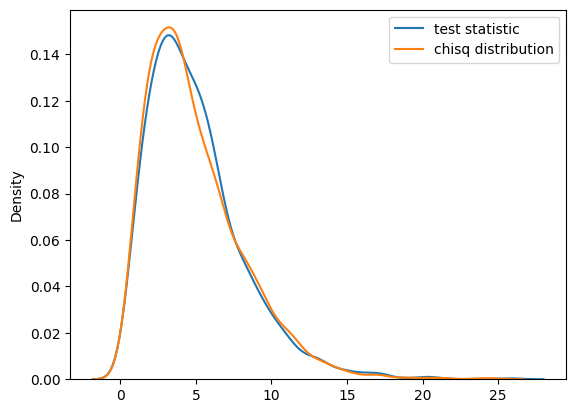

In [173]:
test_statistic_distribution = [get_test_statistic('unbiased') for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(df=K-1, size=3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()